In [46]:
%load_ext autoreload
%autoreload 2
%matplotlib notebook

import os

import pandas as pd
from data_collection import *
import numpy as np

from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.decomposition import PCA
from sklearn.svm import SVC

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
NUM_TEST = 50
SEED = 1

In [3]:
excel = parse_master_file()

In [4]:

L = get_filename_list(excel['Associated data'])

In [5]:
x1 = create_x1_matrix(L)

In [6]:
x4 = create_x4_matrix(L)

In [7]:
x5 = create_x5_matrix(L)

In [8]:
x6 = create_x6_matrix(L)

In [10]:
x7 = create_x7_matrix(L)

In [11]:
y = excel['Output: logK'].values
y_buck = excel['Output: logKbucket'].values
y[-1] = 1
cutoffs = [3]
x10_x17 = excel.iloc[:, 3:-2]

In [20]:
type(y_buck)
bucks = np.unique(y_buck)
bucks

array([0, 1], dtype=int64)

In [18]:
y_buck.shape

(191,)

In [11]:
# y_buck

In [29]:
test_idxs = np.random.randint(0,len(y),NUM_TEST)
train_idxs = np.ones(y.shape,dtype=bool)
train_idxs[test_idxs] = False



In [33]:
y_train = y[train_idxs]
y_test = y[test_idxs]
##how do I put in 901?
y_train_buck = y_buck[train_idxs]
y_test_buck = y_buck[test_idxs]

In [36]:
np.unique(y_train_buck)

array([0, 1], dtype=int64)

In [37]:
print(y_test)
y_test_buck
for fl in range(len(y_test)):
    print(y_test[fl], "compare", y_test_buck[fl])

[5.36 3.92 7.3 6.35 1.69 5.29 14.32 5.92 2.9 12.23 6.04 5.84 6.25 8.51
 5.81 4.34 5 7.12 7.13 6.92 5.12 6.2 9.11 7.08 6.74 6.88 2.9 7.14 6.95
 5.22 6.34 3.27 7.11 7.58 2.85 7.1 7.13 8.51 7.04 3.44 7.14 7.95 4.95 6.92
 5.48 4.38 7.16 7.23 3.2 4.88]
5.36 compare 1
3.92 compare 1
7.3 compare 1
6.35 compare 1
1.69 compare 0
5.29 compare 1
14.32 compare 1
5.92 compare 1
2.9 compare 0
12.23 compare 1
6.04 compare 1
5.84 compare 1
6.25 compare 1
8.51 compare 1
5.81 compare 1
4.34 compare 1
5 compare 1
7.12 compare 1
7.13 compare 1
6.92 compare 1
5.12 compare 1
6.2 compare 1
9.11 compare 1
7.08 compare 1
6.74 compare 1
6.88 compare 1
2.9 compare 0
7.14 compare 1
6.95 compare 1
5.22 compare 1
6.34 compare 1
3.27 compare 0
7.11 compare 1
7.58 compare 1
2.85 compare 0
7.1 compare 1
7.13 compare 1
8.51 compare 1
7.04 compare 1
3.44 compare 0
7.14 compare 1
7.95 compare 1
4.95 compare 1
6.92 compare 1
5.48 compare 1
4.38 compare 1
7.16 compare 1
7.23 compare 1
3.2 compare 0
4.88 compare 1


In [38]:
master, master_names = prepare_master(x10_x17)

In [ ]:
def check_drug(num, reduct_func_lists, pred_func):
    x1_model.pred

In [56]:
def reduction_then_regression(x1, x4, x5, x6, x7, master, train_idxs,test_idxs,reduct_func, pred,y_reduct,y_out):
    y_train = y_reduct[train_idxs]
    y_test = y_reduct[test_idxs]
    y_check = y_out[test_idxs]
    x1_approx_train, x1_model = reduct_func(x1[train_idxs], y_reduct[train_idxs])
    print(x1_approx_train)
    ####what is this outputting???????
    x4_approx_train, x4_model = reduct_func(x1[train_idxs], y_reduct[train_idxs])
    x5_approx_train, x5_model = reduct_func(x1[train_idxs], y_reduct[train_idxs])
    x6_approx_train, x6_model = reduct_func(x1[train_idxs], y_reduct[train_idxs])
    x7_approx_train, x7_model = reduct_func(x1[train_idxs], y_reduct[train_idxs])
    master_train = master[train_idxs]
    master_test = master[test_idxs]                            
    x1_approx_test = reduct_func(x1[test_idxs], y_reduct[test_idxs])[0]
    x4_approx_test = reduct_func(x4[test_idxs], y_reduct[test_idxs])[0]
    x5_approx_test = reduct_func(x5[test_idxs], y_reduct[test_idxs])[0]
    x6_approx_test = reduct_func(x6[test_idxs], y_reduct[test_idxs])[0]
    x7_approx_test = reduct_func(x7[test_idxs], y_reduct[test_idxs])[0]     
#     print(x1_approx_test)                                       
    all_xs_train = np.column_stack((x1_approx_train, x4_approx_train, x5_approx_train, x6_approx_train, x7_approx_train, master_train))                                        
    all_xs_test = np.column_stack((x1_approx_test, x4_approx_test, x5_approx_test, x6_approx_test, x7_approx_test,master_test))
    pred.fit(all_xs_train, y_out[train_idxs])
    predictions = pred.predict(all_xs_test)
    error = predictions - y_check
#     print(y_check)
    print(y_check, "check")
    print(predictions,"guess")
                                            
        # The coefficients
    print('Coefficients: \n', regr.coef_)
    # The mean squared error
    print("Mean squared error: %.2f"
          % mean_squared_error(y_check, predictions))
    # Explained variance score: 1 is perfect prediction
    print('Variance score: %.2f' % r2_score(y_check, predictions))


    pca = PCA(n_components=2)
    all_xs = np.column_stack((x1, x4, x5, x6, x7, master))
    pca.fit(all_xs)
    xs_reduced = pca.transform(all_xs)

    # # Plot outputs
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(xs_reduced[:,0], xs_reduced[:,1], y)
    ax.set_xlabel('PC 1')
    ax.set_ylabel('PC 2')
    ax.set_zlabel('logK')
    return predictions
                                        
                                            


In [57]:
# reduction_then_regression(x1,x4,x5,x6,x7,master,train_idxs,test_idxs,linear_regression_approx,  linear_model.LinearRegression(), y, y)
# reduction_then_regression(x1,x4,x5,x6,x7,master,train_idxs,test_idxs,regression_tree_approx,  linear_model.LinearRegression(), y, y)
reduction_then_regression(x1,x4,x5,x6,x7,master,train_idxs,test_idxs,linear_regression_approx,  SVC(kernel = "linear", max_iter = 10000, C = .1, ), y, y_buck)
# reduction_then_regression(x1,x4,x5,x6,x7,master,train_idxs,test_idxs,decision_tree_approx,  LinearSVC(fit_intercept=True, max_iter = 100000), y, y_buck)


[ 4.38842773  4.38842773  4.62960815  4.80064392  4.89872742  5.54925537
  6.31369781  6.31369781  6.91934204  4.91021729  4.91021729  4.91021729
  4.91021729  4.91021729  4.91021729  4.91021729  4.91021729  4.91021729
  4.91021729  7.2600174   7.35494995  7.35494995  7.95011902  8.30895996
  8.94942474  9.25480652  9.25480652 12.12491608 12.12491608 12.28990936
  6.84729004  6.84729004  6.84729004  7.30947113  6.15070343  6.71939087
  6.45987701  5.85527039  5.85527039  5.33095551  5.33095551  4.2401123
  4.82998657  7.03991699  5.07899475  2.53067017  3.83930969 12.61946869
 11.12489319 14.53938293 14.53938293  9.93916321  9.7795105  14.3006134
 10.36000824 14.87898254 14.00000763  5.08008575  5.99990082  3.94955444
  8.39053345  5.10962677  4.52987671  6.70993042  6.08010101  6.62884521
  7.13950348  7.07997131  4.08953857  4.02719116  4.02719116  4.02719116
  4.94989777  7.08028412  6.65956116  4.30014038  4.3004837   5.51948547
  5.5500946   5.75980377  5.81044769  6.17045593  6.2

NameError: name 'regr' is not defined

In [106]:
# YOOOO
## shouldn't we just be using first index for vals?
# x1_approx_train, x1_lin = linear_regression_approx(x1[train_idxs], y_train)
# x4_approx_train, x4_lin = linear_regression_approx(x4[train_idxs], y_train)
# x5_approx_train, x5_lin = linear_regression_approx(x5[train_idxs], y_train)
# x6_approx_train, x6_lin = linear_regression_approx(x6[train_idxs], y_train)
# x7_approx_train, x7_lin = linear_regression_approx(x7[train_idxs], y_train)
# x1_approx_train_buck, x1_lin_buck = linear_classification_approx(x1[train_idxs], y_buck_train)
# x4_approx_train_buck, x4_lin_buck = linear_classification_approx(x4[train_idxs], y_buck_train)
# x5_approx_train_buck, x5_lin_buck = linear_classification_approx(x5[train_idxs], y_buck_train)
# x6_approx_train_buck, x6_lin_buck = linear_classification_approx(x6[train_idxs], y_buck_train)
# x7_approx_train_buck, x7_lin_buck = linear_classification_approx(x7[train_idxs], y_buck_train)



# x1_approx_train, x1_tree = regression_tree_approx(x1[train_idxs], y_train)
# x4_approx_train, x4_tree = regression_tree_approx(x4[train_idxs], y_train)
# x5_approx_train, x5_tree = regression_tree_approx(x5[train_idxs], y_train)
# x6_approx_train, x6_tree = regression_tree_approx(x6[train_idxs], y_train)
# x7_approx_train, x7_tree = regression_tree_approx(x7[train_idxs], y_train)
# x1_approx_train_buck, x1_lin_buck = decision_tree_approx(x1[train_idxs], y_buck_train)
# x4_approx_train_buck, x4_lin_buck = decision_tree_approx(x4[train_idxs], y_buck_train)
# x5_approx_train_buck, x5_lin_buck = decision_tree_approx(x5[train_idxs], y_buck_train)
# x6_approx_train_buck, x6_lin_buck = decision_tree_approx(x6[train_idxs], y_buck_train)
# x7_approx_train_buck, x7_lin_buck = decision_tree_approx(x7[train_idxs], y_buck_train)
# x1_approx_train = regression_tree_approx(x1[train_idxs], y_train)
# x4_approx_train = regression_tree_approx(x4[train_idxs], y_train)
# x5_approx_train = regression_tree_approx(x5[train_idxs], y_train)
# x6_approx_train = regression_tree_approx(x6[train_idxs], y_train)
# x7_approx_train = regression_tree_approx(x7[train_idxs], y_train)

In [107]:
master_train = master[train_idxs]
master_test = master[test_idxs]

In [108]:
# print(master_train)
print(x7_approx_train)
print(len(x4_approx_train))
print(len(x6_approx_train))
print(len(x7_approx_train))

[ 4.39        4.39        4.63        4.9         5.55        6.315
  6.315       6.92        5.42416667  5.42416667  5.42416667  5.42416667
  5.42416667  5.42416667  5.42416667  5.42416667  5.42416667  5.42416667
  5.42416667  5.42416667  7.26        7.355       7.355       7.58
  7.95        8.31        8.51        8.95        9.26       12.23
 12.62       12.29        4.88        5.48        6.35        6.86
  6.86        6.86        7.3         6.71333333  6.71333333  6.71333333
  6.73        6.73        5.66666667  5.66666667  5.66666667  5.33
  5.33        4.24        4.83        7.04        5.08        3.84
 13.47       13.47       11.125       9.94       14.3        14.88
 14.          6.          8.39        5.11        4.53        6.71
  3.44        6.08        7.14        7.08        4.09        4.
  4.          4.          4.          4.95        7.1         7.13
  7.08        6.66        7.23        4.3         5.52        5.76
  5.81        6.25        6.25        7.04   

In [119]:
# regr = linear_model.LinearRegression()
regr = LinearSVC(fit_intercept=True, max_iter = 100000)
all_xs_train = np.column_stack((x1_approx_train, x4_approx_train, x5_approx_train, x6_approx_train, x7_approx_train, master_train))
# all_xs_train = np.column_stack((x1_approx_train_buck, x4_approx_train_buck, x5_approx_train_buck, x6_approx_train_buck, x7_approx_train_buck, master_train_buck))
# regr.fit(all_xs_train, y_train)
regr.fit(all_xs_train, y_train_buck)

c:\users\mitadm\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=100000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [110]:
x1_approx_test = linear_regression_approx(x1[test_idxs], y_test)[0]
x4_approx_test = linear_regression_approx(x4[test_idxs], y_test)[0]
x5_approx_test = linear_regression_approx(x5[test_idxs], y_test)[0]
x6_approx_test = linear_regression_approx(x6[test_idxs], y_test)[0]
x7_approx_test = linear_regression_approx(x7[test_idxs], y_test)[0]

x1_approx_buck_test = linear_regression_approx(x1[test_idxs], y_test_buck)[0]
x4_approx_buck_test = linear_regression_approx(x4[test_idxs], y_test_buck)[0]
x5_approx_buck_test = linear_regression_approx(x5[test_idxs], y_test_buck)[0]
x6_approx_buck_test = linear_regression_approx(x6[test_idxs], y_test_buck)[0]
x7_approx_buck_test = linear_regression_approx(x7[test_idxs], y_test_buck)[0]


# x1_approx_test = regression_tree_approx(x1[test_idxs], y_test)[0]
# x4_approx_test = regression_tree_approx(x4[test_idxs], y_test)[0]
# x5_approx_test = regression_tree_approx(x5[test_idxs], y_test)[0]
# x6_approx_test = regression_tree_approx(x6[test_idxs], y_test)[0]
# x7_approx_test = regression_tree_approx(x7[test_idxs], y_test)[0]
# x1_approx_test = x1_tree.predict(x1[test_idxs])
# x4_approx_test = x4_tree.predict(x4[test_idxs])
# x5_approx_test = x5_tree.predict(x5[test_idxs])
# x6_approx_test = x6_tree.predict(x6[test_idxs])
# x7_approx_test = x7_tree.predict(x7[test_idxs])

In [120]:
all_xs_test = np.column_stack((x1_approx_buck_test, x4_approx_buck_test, x5_approx_buck_test, x6_approx_buck_test, x7_approx_buck_test,master_test))

In [121]:
predictions = regr.predict(all_xs_test)

In [122]:
# predictions - y_test
predictions - y_test_buck

array([-1, -1,  0,  0,  0, -1, -1, -1, -1, -1, -1, -1,  0, -1,  0, -1, -2,
       -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -1, -1, -1, -2,  0, -1, -2,
       -1, -1, -1, -1, -1, -1,  0, -2,  0, -1, -2, -1, -1,  0,  0, -1],
      dtype=int64)

In [123]:
predictions

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0], dtype=int64)

Coefficients: 
 [[-4.05598243e-01 -2.12203349e-01 -4.01746578e-01 -4.00604223e-01
  -4.01746579e-01 -5.20613540e-01  1.77582285e-01  3.89746747e-01
  -4.08514909e-02  1.91220533e-02  5.07880955e-18  5.86400116e-03
  -3.38813179e-20 -5.08219768e-21 -1.35525272e-20  2.02014643e-03
  -1.13694427e-02  5.12392796e-02 -4.53752785e-02 -1.73472348e-18
   2.71050543e-20  5.08219768e-21 -1.51788304e-18 -4.53752785e-02
  -1.62630326e-19  0.00000000e+00  0.00000000e+00  0.00000000e+00
   5.12392796e-02]
 [-6.00274945e-02  1.45935826e-01 -8.92392923e-02 -2.34578716e-02
  -8.92392925e-02  2.51769996e-01 -2.83668171e-02 -5.52690607e-02
   2.20192230e-01  2.88870420e-03  6.24396454e-02  2.63548685e-02
   3.28378092e-03  2.96018362e-03  5.20417043e-18 -1.77351395e-03
  -1.16970935e-02 -2.21009519e-01 -5.60392050e-02  3.82061855e-02
   6.68544587e-02  2.04586913e-01 -1.65454078e-01 -1.46206680e-01
   1.46725579e-01  1.02256232e-01  2.11204768e-01  1.05082531e-01
  -2.21009519e-01]
 [ 5.31631443e-01  4.6

<IPython.core.display.Javascript object>


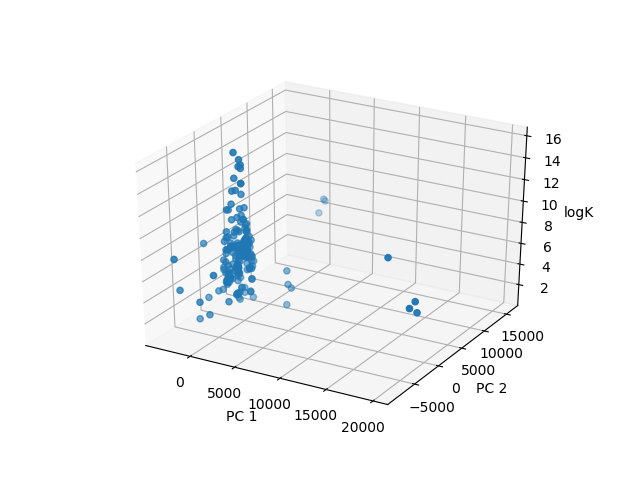

Text(0.5, 0, 'logK')

In [124]:
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, predictions))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, predictions))


pca = PCA(n_components=2)
all_xs = np.column_stack((x1, x4, x5, x6, x7, master))
pca.fit(all_xs)
xs_reduced = pca.transform(all_xs)

# # Plot outputs
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs_reduced[:,0], xs_reduced[:,1], y)
ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
ax.set_zlabel('logK')
